<a href="https://colab.research.google.com/github/DoingThings101/Austral/blob/main/Austral_TP_Grupo_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Predicción del precio del metro cuadrado (m2) en Rosario
**Universidad Austral - Diplomatura en Inteligencia Artificial**

*Trabajo Práctico Final - Grupo 9*





In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [44]:
# Ubicación del Dataset 'MyDrive/Colab Notebooks/' en Google Drive

# Ruta del Dataset
file_path = '/content/drive/MyDrive/Colab Notebooks/Dataset_TP.csv'

# Leer el CSV sin establecer el indice
data = pd.read_csv(file_path)

# Muestra que ahora solo hay características numéricas
print(data.head())
# print(data.sample(5))

  Fecha_venta               Coordenadas  Piso  Tipo    M2  Valor_M2  \
0    9/6/2022  -32.9418530, -60.6646884     7     1  53.0   1301.89   
1   21/6/2022  -32.9592776, -60.6312559    -1    -2  12.5   1144.84   
2   21/6/2022  -32.9592776, -60.6312559     9     1  47.0   1260.14   
3   21/6/2022  -32.9592776, -60.6312559     4     0  37.0   1211.71   
4   21/6/2022  -32.9592776, -60.6312559     9     2  86.5   1228.18   

   Precio_lista  Precio_venta  Canje  Valor_canje M2_canje  Estado_obra  
0       79000.0      69000.00      0          NaN      NaN            4  
1       15000.0      14310.55      1     14248.97   45.334            1  
2       62080.0      59226.59      1     53576.14     45.2            1  
3       46990.0      44833.20      0          NaN      NaN            1  
4      111356.0     106237.69      1     98602.90    83.19            1  


In [45]:
print(data.isnull().sum())

Fecha_venta       0
Coordenadas       0
Piso              0
Tipo              0
M2                0
Valor_M2          0
Precio_lista      0
Precio_venta      0
Canje             0
Valor_canje     260
M2_canje        263
Estado_obra       0
dtype: int64


In [46]:
# Reemplazamos los NaN con 0 en 'Valor_canje' y 'M2_canje'
data['Valor_canje'] = data['Valor_canje'].fillna(0)  # Reemplaza con 0
data['M2_canje'] = data['M2_canje'].fillna(0)  # Reemplaza con 0

In [47]:
print(data.isnull().sum())

Fecha_venta     0
Coordenadas     0
Piso            0
Tipo            0
M2              0
Valor_M2        0
Precio_lista    0
Precio_venta    0
Canje           0
Valor_canje     0
M2_canje        0
Estado_obra     0
dtype: int64


In [48]:
print(f"Mean Valor_M2: {data.Valor_M2.mean()}")
print(f"Median Valor_M2: {data.Valor_M2.median()}")
print(f"Highest Valor_M2: {data.Valor_M2.max()}")
print(f"Lowest Valor_M2: {data.Valor_M2.min()}")

Mean Valor_M2: 1351.3141569767442
Median Valor_M2: 1359.74
Highest Valor_M2: 2362.07
Lowest Valor_M2: 495.32


In [49]:
figura = px.bar(data, x=data["Tipo"], y = data["Valor_M2"], color = data["Valor_M2"], title="Valor del M2 de acuerdo a la tipología")
figura.show()
print('-2:Cochera / -1: Baulera / 0: Monoambiente / 1: 1 Domitorio / 2: 2 Dormitorios / 3: 3 Dormitorios / 22: Duplex 2 dormitorios')

-2:Cochera / -1: Baulera / 0: Monoambiente / 1: 1 Domitorio / 2: 2 Dormitorios / 3: 3 Dormitorios / 22: Duplex 2 dormitorios


In [50]:
figura = px.bar(data, x=data["Piso"], y = data["Valor_M2"], color = data["Valor_M2"], title="Valor del M2 según el Piso")
figura.show()
print('-1: Subsuelo / 0: PB / 1+: Piso')

-1: Subsuelo / 0: PB / 1+: Piso


In [51]:
tipos = data["Tipo"].value_counts()
etiqueta = tipos.index
cantidad = tipos.values
colores = ['gold','lightgreen']

fig = go.Figure(data=[go.Pie(labels=etiqueta, values=cantidad, hole=0.5)])
fig.update_layout(title_text='Cantidad unidades por tipología')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30, marker=dict(colors=colores, line=dict(color='black', width=3)))
fig.show()
print('-2:Cochera / -1: Baulera / 0: Monoambiente / 1: 1 Domitorio / 2: 2 Dormitorios / 3: 3 Dormitorios / 22: Duplex 2 dormitorios')

-2:Cochera / -1: Baulera / 0: Monoambiente / 1: 1 Domitorio / 2: 2 Dormitorios / 3: 3 Dormitorios / 22: Duplex 2 dormitorios


In [52]:
tipos = data["Piso"].value_counts()
etiqueta = tipos.index
cantidad = tipos.values
colores = ['gold','lightgreen']

fig = go.Figure(data=[go.Pie(labels=etiqueta, values=cantidad, hole=0.5)])
fig.update_layout(title_text='Cantidad unidades por Piso')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30, marker=dict(colors=colores, line=dict(color='black', width=3)))
fig.show()
print('-1: Subsuelo / 0: PB / 1+: Piso')


-1: Subsuelo / 0: PB / 1+: Piso


In [53]:
print(data.head())

  Fecha_venta               Coordenadas  Piso  Tipo    M2  Valor_M2  \
0    9/6/2022  -32.9418530, -60.6646884     7     1  53.0   1301.89   
1   21/6/2022  -32.9592776, -60.6312559    -1    -2  12.5   1144.84   
2   21/6/2022  -32.9592776, -60.6312559     9     1  47.0   1260.14   
3   21/6/2022  -32.9592776, -60.6312559     4     0  37.0   1211.71   
4   21/6/2022  -32.9592776, -60.6312559     9     2  86.5   1228.18   

   Precio_lista  Precio_venta  Canje  Valor_canje M2_canje  Estado_obra  
0       79000.0      69000.00      0         0.00        0            4  
1       15000.0      14310.55      1     14248.97   45.334            1  
2       62080.0      59226.59      1     53576.14     45.2            1  
3       46990.0      44833.20      0         0.00        0            1  
4      111356.0     106237.69      1     98602.90    83.19            1  


In [54]:
data[['latitud', 'longitud']] = data['Coordenadas'].str.split(',', expand=True)
data.drop(columns=['Coordenadas'], inplace=True)
print(data.head())

  Fecha_venta  Piso  Tipo    M2  Valor_M2  Precio_lista  Precio_venta  Canje  \
0    9/6/2022     7     1  53.0   1301.89       79000.0      69000.00      0   
1   21/6/2022    -1    -2  12.5   1144.84       15000.0      14310.55      1   
2   21/6/2022     9     1  47.0   1260.14       62080.0      59226.59      1   
3   21/6/2022     4     0  37.0   1211.71       46990.0      44833.20      0   
4   21/6/2022     9     2  86.5   1228.18      111356.0     106237.69      1   

   Valor_canje M2_canje  Estado_obra      latitud      longitud  
0         0.00        0            4  -32.9418530   -60.6646884  
1     14248.97   45.334            1  -32.9592776   -60.6312559  
2     53576.14     45.2            1  -32.9592776   -60.6312559  
3         0.00        0            1  -32.9592776   -60.6312559  
4     98602.90    83.19            1  -32.9592776   -60.6312559  


In [56]:
#Separando el dataset
x = np.array(data[["Piso", "Tipo", "M2", "Estado_obra", "latitud", "longitud"]], dtype=np.float32) # Convert to float32
y = np.array(data[["Valor_M2"]], dtype=np.float32)  # Convert to float32

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.10, random_state=33)

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dense

model = Sequential()
model.add(Input(shape=(xtrain.shape[1], 1)))  # Define la forma de entrada explícitamente
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(50))
model.add(Dense(1))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 6, 128)              │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 50)                  │           3,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 119,269 (465.89 KB)

 Trainable params: 119,269 (465.89 KB)

 Non-trainable params: 0 (0.00 B)

In [60]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(xtrain, ytrain, batch_size=1, epochs=50)

Epoch 1/50
309/309 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 58702.3398
Epoch 2/50
309/309 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 48675.9766
Epoch 3/50
309/309 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 38952.2305
Epoch 4/50
309/309 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 56646.0117
Epoch 5/50
309/309 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 40940.4609
Epoch 6/50
309/309 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 41412.9453
Epoch 7/50
309/309 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 38748.1875
Epoch 8/50
309/309 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 49943.0000
Epoch 9/50
309/309 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 41288.0742
Epoch 10/50
309/309 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 57038.6211
Epoch 11/50
309/309 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 42694.0938
Epoch 12/50
309/309 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 44672.8789
Epoch 13/50
309/309 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 41206.8086
Epoch 14/50
309/309 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 38091.

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 405ms/step


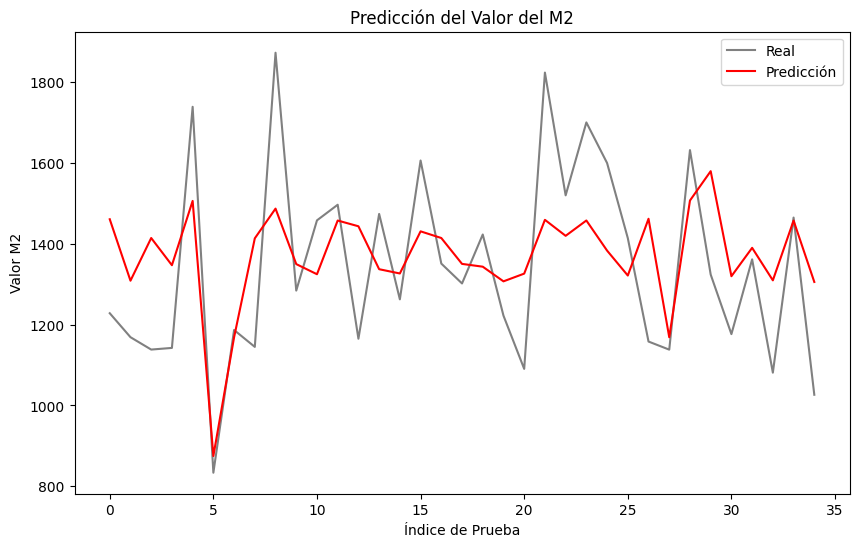


El error cuadrático medio es 191.47.


In [61]:
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Realizar predicciones
ypred = model.predict(xtest)

# Convertir a 1D si es necesario (para ytest y ypred)
ytest_flattened = ytest.flatten()  # Convertir ytest a una dimensión
ypred_flattened = ypred.flatten()  # Convertir ypred a una dimensión

# Función para graficar valores reales vs predicciones
def plot_predictions(test, predicted):
    plt.figure(figsize=(10, 6))
    plt.plot(test, color="gray", label="Real")
    plt.plot(predicted, color="red", label="Predicción")
    plt.title("Predicción del Valor del M2")
    plt.xlabel("Índice de Prueba")
    plt.ylabel("Valor M2")
    plt.legend()
    plt.show()

# Función para calcular el RMSE
def return_rmse(test, predicted):
    rmse = np.sqrt(mean_squared_error(test, predicted))
    print("\nEl error cuadrático medio es {:.2f}.".format(rmse))

# Llamar a las funciones
plot_predictions(ytest_flattened, ypred_flattened)
return_rmse(ytest_flattened, ypred_flattened)


In [ ]:
# Para predecir el Valor_M2, ingresar "Piso", "Tipo", "M2", "Estado_obra", "latitud", "longitud"

print("Ingrese los datos del departamento para presupuestar\n")
print("Tipo = -2:Cochera / -1: Baulera / 0: Monoambiente / 1: 1 Domitorio / 2: 2 Dormitorios / 3: 3 Dormitorios / 22: Duplex 2 dormitorios\n")
a = int(input("Número de Piso (-1 -- 12): "))
b = int(input("Tipología (-2:Cochera / -1: Baulera / 0: Monoambiente / 1: 1 Domitorio / 2: 2 Dormitorios / 3: 3 Dormitorios / 22: Duplex 2 dormitorios): "))
c = int(input("Metros cuadrados (número sin decimales): "))
d = int(input("Estado de la obra (1: Pozo / 2: Pozo menos 6 meses / 3: Pozo 6-12 meses / 4: Pozo 12-24 meses / 5: Terminado): "))
e = float(input("Latitud: ").replace(',', '.'))
f = float(input("Longitud: ").replace(',', '.'))
features = np.array([[a, b, c, d, e, f]])
print("\nValor M2 predecido = ", model.predict(features))

Ingrese los datos del departamento para presupuestar

Tipo = -2:Cochera / -1: Baulera / 0: Monoambiente / 1: 1 Domitorio / 2: 2 Dormitorios / 3: 3 Dormitorios / 22: Duplex 2 dormitorios

Número de Piso (-1 -- 12): 2
Tipología (-2:Cochera / -1: Baulera / 0: Monoambiente / 1: 1 Domitorio / 2: 2 Dormitorios / 3: 3 Dormitorios / 22: Duplex 2 dormitorios): 2
Metros cuadrados (número sin decimales): 95
Estado de la obra (1: Pozo / 2: Pozo menos 6 meses / 3: Pozo 6-12 meses / 4: Pozo 12-24 meses / 5: Terminado): 5
Latitud: -32,9418728
Longitud: -60,6556641
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step

Valor M2 predecido =  [[1357.4589]]
